In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
new_delhi = "../AQI CSV Files_raw_data/New_delhi_csv.csv"
covid_data = "../Saved_csv_files_alvaro/covid_deaths.csv"

In [3]:
new_delhi = pd.read_csv(new_delhi, delimiter=", ")
covid_data = pd.read_csv(covid_data, delimiter=",")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
new_delhi.head()

,date,pm25
0,2020/7/2,131
1,2020/7/3,142
2,2020/7/4,144
3,2020/7/5,116
4,2020/7/6,80


In [5]:
new_delhi[["Year","Month", "Day"]] = new_delhi["date"].str.split("/", n = 2, expand = True) 
new_delhi.drop(columns =["date"], inplace = True) 
new_delhi

,pm25,Year,Month,Day
0,131,2020,7,2
1,142,2020,7,3
2,144,2020,7,4
3,116,2020,7,5
4,80,2020,7,6
...,...,...,...,...
1912,413,2014,12,25
1913,393,2014,12,26
1914,289,2014,12,27
1915,274,2014,12,28


In [6]:
new_delhi["Year"] = new_delhi["Year"].astype(int)
new_delhi["Month"] = new_delhi["Month"].astype(int)
# new_delhi = new_delhi[new_delhi["Year"]>2017]
new_delhi = new_delhi[new_delhi["Month"]<8]
new_delhi

,pm25,Year,Month,Day
0,131,2020,7,2
1,142,2020,7,3
2,144,2020,7,4
3,116,2020,7,5
4,80,2020,7,6
...,...,...,...,...
1893,141,2015,3,28
1894,150,2015,3,29
1895,173,2015,3,30
1896,134,2015,3,31


In [7]:
new_delhi = new_delhi[["Year", "Month", "Day", "pm25"]]
new_delhi.rename(columns={"pm25":"PM2.5"},inplace=True)
new_delhi

,Year,Month,Day,PM2.5
0,2020,7,2,131
1,2020,7,3,142
2,2020,7,4,144
3,2020,7,5,116
4,2020,7,6,80
...,...,...,...,...
1893,2015,3,28,141
1894,2015,3,29,150
1895,2015,3,30,173
1896,2015,3,31,134


In [8]:
new_delhi.sort_values(by=['Year','Month'], ascending=True)
new_delhi

,Year,Month,Day,PM2.5
0,2020,7,2,131
1,2020,7,3,142
2,2020,7,4,144
3,2020,7,5,116
4,2020,7,6,80
...,...,...,...,...
1893,2015,3,28,141
1894,2015,3,29,150
1895,2015,3,30,173
1896,2015,3,31,134


In [9]:
AQI = []
for value in new_delhi["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
new_delhi["AQI"] = AQI
new_delhi

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,131,189.9
1,2020,7,3,142,195.6
2,2020,7,4,144,196.6
3,2020,7,5,116,182.2
4,2020,7,6,80,163.6
...,...,...,...,...,...
1893,2015,3,28,141,195.1
1894,2015,3,29,150,199.7
1895,2015,3,30,173,223.3
1896,2015,3,31,134,191.5


In [10]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
new_delhi["Levels of Concern"]=pd.cut(new_delhi["AQI"], bins, labels=quality, include_lowest=True)
new_delhi

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,131,189.9,Unhealthy
1,2020,7,3,142,195.6,Unhealthy
2,2020,7,4,144,196.6,Unhealthy
3,2020,7,5,116,182.2,Unhealthy
4,2020,7,6,80,163.6,Unhealthy
...,...,...,...,...,...,...
1893,2015,3,28,141,195.1,Unhealthy
1894,2015,3,29,150,199.7,Unhealthy
1895,2015,3,30,173,223.3,Very Unhealthy
1896,2015,3,31,134,191.5,Unhealthy


In [11]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
new_delhi["Daily AQI Color"]=pd.cut(new_delhi["AQI"], bins, labels=colors, include_lowest=True)
new_delhi

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,131,189.9,Unhealthy,Red
1,2020,7,3,142,195.6,Unhealthy,Red
2,2020,7,4,144,196.6,Unhealthy,Red
3,2020,7,5,116,182.2,Unhealthy,Red
4,2020,7,6,80,163.6,Unhealthy,Red
...,...,...,...,...,...,...,...
1893,2015,3,28,141,195.1,Unhealthy,Red
1894,2015,3,29,150,199.7,Unhealthy,Red
1895,2015,3,30,173,223.3,Very Unhealthy,Purple
1896,2015,3,31,134,191.5,Unhealthy,Red


In [12]:
## Review number of days availble for mean AQI to view how mean could be affected
new_delhi.groupby(["Year","Month"]).count()

Day  PM2.5  AQI  Levels of Concern  Daily AQI Color
Year Month                                                     
2015 1       30     30   30                 30               30
     2       28     28   28                 28               28
     3       30     30   30                 30               30
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       27     27   27                 27               27
2016 1       28     28   28                 28               28
     2       29     29   29                 29               29
     3       29     29   29                 29               29
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       29     29   29                 29               29
2017 1       31     31   31                 31               31
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       30     30   30                 30               30
     6       30     30   30                 30               30
     7       30     30   30                 30               30
2018 1       31     31   31                 31               31
     2       25     25   25                 25               25
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       29     29   29                 29               29
     7       31     31   31                 31               31
2019 1       30     30   30                 30               30
     2       11     11   11                 11               11
     3       13     13   13                 13               13
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       31     31   31                 31               31
2020 1       30     30   30                 30               30
     2       29     29   29                 29               29
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       26     26   26                 26               26

In [13]:
new_delhi_agg = new_delhi.groupby(["Year","Month"]).agg({"AQI":["mean","min","max","sem"]})
delhi_months = new_delhi_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
delhi_months

AQI                         
                  mean    min    max        sem
Year Month                                     
2015 Jan    290.896667  218.3  356.0   8.079590
     Feb    249.592857  208.4  314.4   4.749035
     Mar    205.350000  163.6  240.1   3.463649
     Apr    193.480000  163.1  222.3   2.941324
     May    201.132258  175.5  239.2   2.815267
     June   188.763333  153.8  222.3   3.399755
     Jul    162.285185   71.8  233.2   6.713274
2016 Jan    374.042857  251.0  477.9  11.516461
     Feb    259.717241  196.1  363.9   8.640534
     Mar    206.275862  159.0  303.5   6.687220
     Apr    206.263333  168.3  322.3   6.710596
     May    209.022581  162.6  390.7   7.082975
     June   188.156667  169.8  212.4   2.150572
     Jul    175.765517  156.9  207.4   2.259606
2017 Jan    275.441935  188.4  376.8   7.771689
     Feb    228.778571  184.8  304.5   5.264982
     Mar    199.670968  160.5  240.1   3.294757
     Apr    204.850000  165.2  265.9   4.797872
     May    209.083333  167.8  268.9   4.775912
     June   184.343333  155.4  218.3   2.566140
     Jul    166.266667  109.6  191.0   2.945370
2018 Jan    330.538710  250.1  446.9   9.250597
     Feb    239.244000  189.9  309.4   6.053462
     Mar    206.106452  186.8  266.9   2.972573
     Apr    202.393333  166.7  254.0   3.700953
     May    203.132258  172.9  251.0   3.052964
     June   204.065517  159.0  336.2   7.412239
     Jul    176.829032  163.1  208.4   2.015681
2019 Jan    293.216667  183.8  417.2  11.451307
     Feb    256.918182  187.9  317.4  13.294741
     Mar    199.830769  173.4  234.2   4.361007
     Apr    202.180000  154.9  249.1   3.250077
     May    217.712903  177.0  326.3   6.688877
     June   193.040000  161.1  216.4   2.452124
     Jul    182.377419  154.9  207.4   2.926302
2020 Jan    266.660000  197.2  405.3   9.095358
     Feb    239.068966  183.8  291.7   5.301443
     Mar    187.293548  155.4  215.4   3.009590
     Apr    176.083333  161.6  192.0   1.755131
     May    186.432258  161.6  210.4   2.358113
     June   180.000000  157.4  199.2   1.945262
     Jul    169.407692  151.3  196.6   2.670246

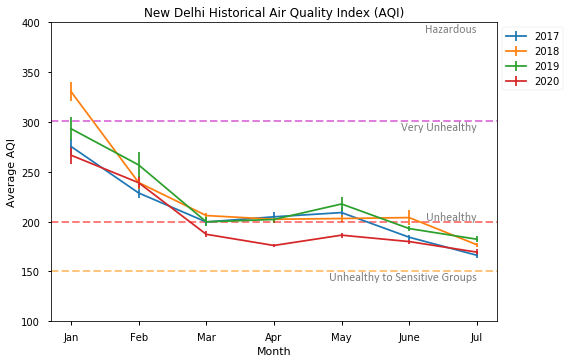

In [89]:
# fig= plt.figure(figsize=(9,7))
plt.style.use('seaborn-notebook')
# plt.xkcd()
# z = [50, 100, 150, 200, 300]
delhi_months["AQI"]["mean"].loc[2017].plot.line(label=2017, yerr=delhi_months["AQI"]["sem"].loc[2017])
delhi_months["AQI"]["mean"].loc[2018].plot.line(label=2018, yerr=delhi_months["AQI"]["sem"].loc[2018])
delhi_months["AQI"]["mean"].loc[2019].plot.line(label=2019, yerr=delhi_months["AQI"]["sem"].loc[2019])
delhi_months["AQI"]["mean"].loc[2020].plot.line(label=2020, yerr=delhi_months["AQI"]["sem"].loc[2020])

plt.text(6,399,'Hazardous', ha='right', va='top', fontsize=12, family='calibri',alpha=.5)
plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri',alpha=.5)
plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri',alpha=.5)
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri',alpha=.5)
# plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
# plt.text(6,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri')
# plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
# plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri')

plt.ylim(100,400)
plt.title("New Delhi Historical Air Quality Index (AQI)")
plt.ylabel("Average AQI")
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
plt.savefig("../Saved_figures_alvaro/new_delhi.png")
plt.show()

In [15]:
# Create clean dataframe with only mean AQI to plot in heatmap
new_delhi_months_df = new_delhi.groupby(["Year","Month"]).mean()
new_delhi_months_df.drop(columns = ["PM2.5"], inplace = True) 
new_delhi_months_df["AQI"] = round(new_delhi_months_df["AQI"])
new_delhi_ave = new_delhi_months_df

In [16]:
# write new dataframe new_delhi_ave to csv file
new_delhi_ave.to_csv("../Saved_csv_files_alvaro/new_delhi_ave_aqi.csv")

In [17]:
## Reference for specific data in df
# delhi_months["AQI"]["mean"]
# delhi_months["AQI"]["mean"].loc[2018]

In [18]:
# covid_less = covid_data.drop(columns=["State"])
# covid_months = covid_less.rename(columns={'Jan_sum':'Jan', 'Feb_sum':'Feb', 'Mar_sum':'Mar', 'Apr_sum':'Apr', 'May_sum':'May',
#        'Jun_sum':'Jun', 'Jul_sum':'Jul'})
# # covid_months.loc[covid_months["Country"]=="India"]
# country = covid_months.groupby(["Country"]).sum()
# countries = country.rename({"Korea, South":"South Korea"}, axis='index')
# countries

In [19]:
# countries.loc["India"].plot()
# plt.show()

In [20]:
# reduced_kickstarter_df.loc[reduced_kickstarter_df["country"] == "US"]

In [21]:
## Testing how to plot categorical data
# new_delhi.groupby(["Year","Month","AQI"]).head().plot(x="Month", y="AQI")
# new_delhi.groupby(["Year","Month","Day","AQI"])["Levels of Concern"].apply(list)

In [22]:
# good = np.arange(51)
# moderate = np.arange(51,101)
# usg = np.arange(101,151)
# unhealthy = np.arange(151,201)
# vu = np.arange(201,301)
# haz = np.arange(301,501)
# data = {"Good":good,"Moderate":moderate,"Unhealthy SG":usg,"Unhealthy":unhealthy,"Very Unhealthy":vu,"Hazardous":haz}
# levels = pd.DataFrame(data=data )

In [23]:
# test_bins["AQI"].loc[2018,3][0:3]

In [24]:
# bins = [0,50,100,150,200,300,500]
# quality = ["1","2","3","4","5","6"]

# # place the data series into a new column inside of the DataFrame
# test_bins["Levels"]=pd.cut(test_bins["AQI"]["mean"], bins, labels=quality, include_lowest=True)
# levels = test_bins
# levels

In [25]:
# levels.Levels.plot(secondary_y=True, style='g')
# levels["Levels"]
# ax = levels["AQI"]["mean"].loc[2018].plot(secondary_y=levels['Levels'])
